In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

from ecbdata import ecbdata

df2 = ecbdata.get_series('ICP.M.U2.N.000000.4.ANR', 
                        start='2005-01')

In [4]:
final_data = pd.read_csv("Final_Working_Data.csv")
final_data.tail(10)

,Unnamed: 0,Date,Media,Member,Link,Information,Questions,Answers,Metaphors,Metaphors Sentence,...,Gender,Country,Period on the Board,list_regex,list_regex_reduced,list_regex_len,list_regex_reduced_len,text_length,pos_metaphors,pos_metaphors_len
509,509,2023-01-17,Interview with Financial Times,Philip R. Lane,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Philip R. Lane, Member of the E...","From your perspective, how much do you see the...",17 January 2023[end_answer] The way to think a...,"['inflationary pressure', 'inflationary enviro...",['For me the way to differentiate these narrat...,...,M,Ireland,2019 -,['there s a large global component to inflatio...,['there s a large global component to inflatio...,50,48,25435,"[('inflation', 'come'), ('inflation', 'fight')...",12
510,510,2024-04-23,Interview with Le Monde,Luis de Guindos,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Luis de Guindos, Vice-President...","In March, inflation in the euro area was 2.4%,...",23 April 2024[end_answer] The battle isn’t ove...,NaN,NaN,...,M,Spain,2018 -,['the battle be not over but we have notch up ...,['the battle be not over but we have notch up ...,8,8,5575,"[('inflation', 'fall')]",1
511,511,2024-03-19,Interview with Naftemporiki,Luis de Guindos,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Luis de Guindos, Vice-President...",Inflation has been declining and the European ...,19 March 2024[end_answer] Looking at recent in...,NaN,NaN,...,M,Spain,2018 -,['look at recent inflation development we can ...,['look at recent inflation development we can ...,7,7,4584,[],0
512,512,2024-02-07,Interview with Financial Times,Isabel Schnabel,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Isabel Schnabel, Member of the ...","Now that inflation is fading, some say it was ...",7 February 2024[end_answer] It's a myth that t...,NaN,NaN,...,F,Germany,2020 -,['it be a myth that the inflation trajectory w...,['it be a myth that the inflation trajectory w...,28,26,19513,"[('inflation', 'see'), ('inflation', 'flare'),...",8
513,513,2024-02-03,Interview with De Volkskrant,Frank Elderson,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Frank Elderson, Member of the E...",Coming from a supervisor charged with assessin...,3 February 2024[end_answer] In its introductio...,NaN,NaN,...,M,Netherlands,2020 -,['ECB research show that as a consequence the ...,['ECB research show that as a consequence the ...,2,2,5702,[],0
514,514,2024-01-31,Interview with Die Zeit,Luis de Guindos,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Luis de Guindos, Vice-President...","Mr de Guindos, Germany is in a recession, the ...",31 January 2024[end_answer] There are three re...,NaN,NaN,...,M,Spain,2018 -,['there be three reason for the weak growth in...,['there be three reason for the weak growth in...,10,9,6137,"[('inflation', 'fight'), ('inflation', 'reduce...",4
515,515,2024-01-22,Thanks to Wolfgang Schäuble,Christine Lagarde,https://www.ecb.europa.eu/press/inter/date/202...,"Contribution by Christine Lagarde, President o...",Disclaimer,"Frankfurt am Main, 22 January 2024[end_answer]...",NaN,NaN,...,F,France,2019 -,[],[],0,0,4102,[],0
516,516,2024-01-13,Interview with Corriere della Sera,Philip R. Lane,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Philip R. Lane, Member of the E...",The rate hike in September was meant to increa...,13 January 2024[end_answer] The first point to...,"['cool down inflation', 'easing of core inflat...",['By underlining that the ECB will maintain a ...,...,M,Ireland,2019 -,['the first point to make be that there have b...,['the first point to make be that there have b...,23,23,9428,"[('core', 'inflation'), ('high', 'inflation'),...",6
517,517,2024-01-10,Q&A on X,Isabel Schnabel,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Isabel Schnabel, Member of the ...",Who decided that 2% inflation is good and what...

In [5]:
data_subset = final_data[['Date', 'pos_metaphors_len']]
grouped_data = data_subset.groupby('Date').agg({'pos_metaphors_len': ['count', 'sum']})
print(grouped_data)

In [15]:
final_data['Date'] = pd.to_datetime(final_data['Date'])
final_data['Month'] = final_data['Date'].dt.to_period('M')

# Step 3 & 4: Group by 'Month' and aggregate 'pos_metaphors_len'
grouped_data = final_data.groupby('Month').agg(count=('pos_metaphors_len', 'count'), 
                                                sum=('pos_metaphors_len', 'sum'))


filtered_data = grouped_data[grouped_data.index > '2015-12-31']
# The result is a DataFrame with 'Month' as index and two columns: 'count' and 'sum'
grouped_data.head(10)

,count,sum
Month,,
2005-01,3,0
2005-02,2,0
2005-03,2,0
2005-06,2,1
2005-08,1,0
2005-09,1,1
2005-10,1,0
2005-11,1,1
2005-12,5,2


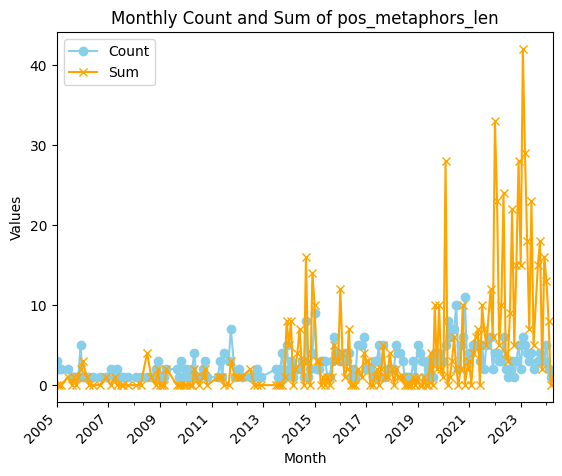

In [17]:
fig, ax = plt.subplots()

# Change to line plot
grouped_data['count'].plot(kind='line', color='skyblue', ax=ax, label='Count', marker='o')
grouped_data['sum'].plot(kind='line', color='orange', ax=ax, label='Sum', marker='x')

# Add title, legend, and labels
ax.set_title('Monthly Count and Sum of pos_metaphors_len')
ax.set_xlabel('Month')
ax.set_ylabel('Values')
plt.legend()

# Adjust x-axis to show 1 in every 10 labels
ticks = ax.get_xticks()
# Ensure there are enough ticks to filter
if len(ticks) > 10:
    selected_ticks = ticks[::10]  # Select every 10th tick
    selected_labels = [grouped_data.index[int(tick)].strftime('%Y-%m') if tick < len(grouped_data.index) else '' for tick in selected_ticks]
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels, rotation=45, ha="right")
else:
    # If not enough ticks, just rotate existing for clarity
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show plot
plt.show()

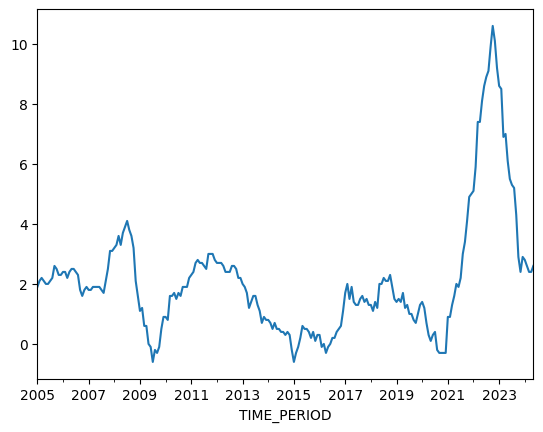

In [20]:
df2['TIME_PERIOD'] = pd.to_datetime(df2['TIME_PERIOD'])  # Convert the 'TIME_PERIOD' column to datetime
df2.set_index('TIME_PERIOD', inplace=True)  # Set 'TIME_PERIOD' as the index of df2

df2['OBS_VALUE'].plot()  # Plot the 'OBS_VALUE' column
plt.show()